# Neural Network

## 1 Import libraries and dataset

Documented here is the version of the file that in the end proved to produce the best performing model whose results were taken into the presentation. But in the meantime the Data Preparation had evolved to produce a slightly different version of features that is also used by the Baseline Model. Therefore the output of the following cell is a little different from the output of the last cell of the Data Preparation notebook.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
df = pd.read_csv("../0_DataPreparation/features.csv")
pd.set_option('display.max_columns', None)
# Convert 'Datum' to datetime format
df['Datum'] = pd.to_datetime(df['Datum'], format='%Y-%m-%d')
df.head()  # Print first few rows to verify

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Rain_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochentag,Wochenende,Monat,Silvester,Feiertag,Schulferien,Temperatureclass_enc,Cloudclass_enc,Windclass_enc,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,6.8,728.23,1.442231,1,14.4575,1,0,0,0,7,0,0,1,2,1,2,1,0,0,0,0,0,True,False,False,False,False,False
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,6.8,728.23,0.140967,0,15.4100,0,0,1,0,7,0,0,1,2,1,2,0,0,1,0,0,0,True,False,False,False,False,False
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,6.8,728.23,5.542491,1,17.0150,1,0,2,0,7,0,0,1,2,0,0,0,0,0,1,0,0,True,False,False,False,False,False
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,6.8,728.23,0.126180,0,17.8175,0,0,3,0,7,0,0,1,2,0,0,1,0,0,0,0,0,True,False,False,False,False,False
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,6.8,728.23,1.255988,1,19.0100,0,0,4,0,7,0,0,1,2,1,2,0,0,1,0,0,0,True,False,False,False,False,False


## 2 Inspect data

In [2]:
df.describe() 

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Rain_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochentag,Wochenende,Monat,Silvester,Feiertag,Schulferien,Temperatureclass_enc,Cloudclass_enc,Windclass_enc,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice
count,1.116400e+04,11164,11164.000000,9334.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.00000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000
mean,1.609066e+06,2016-07-13 18:31:28.355428096,3.088678,206.749044,4.753225,12.037294,10.964329,1.838960,0.024006,95.740407,5.971345,802.698701,0.941856,0.239251,12.029694,0.106413,0.080795,3.005106,0.28789,6.658097,0.002418,0.010749,0.234593,1.226711,0.616446,1.144572,0.151290,0.091723,0.405052,0.317359,0.015407,0.019169
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,0.000000,-8.475000,1.801104,0.000000,0.000000,93.100000,4.800000,728.230000,0.000000,0.000000,-5.395000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.501043e+06,2015-01-04 00:00:00,2.000000,96.897441,3.000000,6.250000,8.000000,0.000000,0.000000,94.100000,5.400000,755.840000,0.000000,0.000000,6.387500,0.000000,0.000000,1.000000,0.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.607148e+06,2016-07-14 12:00:00,3.000000,161.900831,6.000000,11.625000,10.000000,0.232078,0.000000,95.100000,6.000000,803.380000,0.000000,0.000000,11.635000,0.000000,0.000000,3.000000,0.00000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.801174e+06,2018-01-17 00:00:00,4.000000,280.644663,7.000000,17.865625,13.000000,2.340435,0.000000,97.000000,6.500000,847.260000,0.920094,0.000000,18.000000,0.000000,0.000000,5.000000,1.00000,10.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.907305e+06,2019-07-30 00:00:00,6.000000,1879.461831,8.000000,32.671428,35.000000,40.228697,1.000000,100.300000,7.300000,891.830000,26.715723,1.000000,28.347500,1.000000,1.000000,6.000000,1.00000,12.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.791961e+05,NaN,1.488413,144.545189,2.635712,7.196683,4.155144,3.419483,0.153074,1.912069,0.663198,49.220730,2.031688,0.426645,6.884985,0.308380,0.272533,2.003015,0.45280,3.467332,0.049121,0.103123,0.423763,0.777448,0.486273,0.971541,0.358347,0.288648,0.490924,0.465469,0.123169,0.137124


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 11164 non-null  int64         
 1   Datum                              11164 non-null  datetime64[ns]
 2   Warengruppe                        11164 non-null  int64         
 3   Umsatz                             9334 non-null   float64       
 4   Bewoelkung                         11164 non-null  float64       
 5   Temperatur                         11164 non-null  float64       
 6   Windgeschwindigkeit                11164 non-null  float64       
 7   Rain                               11164 non-null  float64       
 8   KielerWoche                        11164 non-null  int64         
 9   CPI                                11164 non-null  float64       
 10  Unemployment                      

In [4]:
df.iloc[:,20:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Silvester                          11164 non-null  int64
 1   Feiertag                           11164 non-null  int64
 2   Schulferien                        11164 non-null  int64
 3   Temperatureclass_enc               11164 non-null  int64
 4   Cloudclass_enc                     11164 non-null  int64
 5   Windclass_enc                      11164 non-null  int64
 6   Weather_After_Rain                 11164 non-null  int64
 7   Weather_Fog                        11164 non-null  int64
 8   Weather_Other                      11164 non-null  int64
 9   Weather_Rain                       11164 non-null  int64
 10  Weather_Showers_and_Thunderstorms  11164 non-null  int64
 11  Weather_Snow_and_Ice               11164 non-null  int64
 12  Group_brot        

## 3 Prepare data
Some data preparation tasks are done here because of the process of trying out different approaches and checking the effects on the performance of the neural network. This can also be seen in the large amount of outcommented lines.

In [5]:
# Create a year column
# df['Year'] = df['Datum'].dt.year
# Create a dummy defining date 2014-05-05 as outlier
# df['Outlier'] = np.where(df['Datum'] == '2014-05-05', 1, 0)

# df["is_month_start"] = df["Datum"].dt.is_month_start.astype(int)
# df["is_month_end"] = df["Datum"].dt.is_month_end.astype(int)

# # Create week_of_year column
# df['week_of_year'] = df['Datum'].dt.isocalendar().week
# # Create a day_of_year column
# df['day_of_year'] = df['Datum'].dt.dayofyear
# # Create quarter column
# df['quarter'] = df['Datum'].dt.quarter
# Create days_since_start column
# df['days_since_start'] = (df['Datum'] - df['Datum'].min()).dt.days

# Create cyclical features for better representation
df['Month_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['Wochentag'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['Wochentag'] / 7)

columns_to_drop = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Warengruppe'
                   , 'Windclass_enc', 'Rain_8to18'
                  #  , 'Weather_After_Rain', 'Weather_Fog', 'Weather_Rain', 'Weather_Other', 'Weather_Showers_and_Thunderstorms', 'Weather_Snow_and_Ice'
                   ]
data = df.drop(columns=columns_to_drop)  


In [6]:
numeric_features = ['GDP', 'Unemployment', 'CPI']
categorical_features = ['Wochentag', 'Monat'
                        # , 'week_of_year'
                        # , 'day_of_year', 'quarter'
                        , 'Temperatureclass_enc', 'Cloudclass_enc'
                        # , 'Windclass_enc'
                        # , 'Celebration'
                        ]
dummy_features = ['KielerWoche', 'Schulferien', 'Silvester'
                ,  'Weather_After_Rain', 'Weather_Fog', 'Weather_Rain', 'Weather_Other', 'Weather_Showers_and_Thunderstorms', 'Weather_Snow_and_Ice']

In [7]:
# Inspect data types and unique values for categorical columns
print(data[categorical_features].dtypes)
print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))


Wochentag               int64
Monat                   int64
Temperatureclass_enc    int64
Cloudclass_enc          int64
dtype: object
Unique Values:
 Wochentag                                 [0, 1, 2, 3, 4, 5, 6]
Monat                   [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
Temperatureclass_enc                               [2, 3, 1, 0]
Cloudclass_enc                                           [1, 0]
dtype: object


In [8]:
# Ensure categorical columns are treated as categories
for col in categorical_features:
    data[col] = data[col].astype('category')

# Encode categorical variables with more than 2 unique values
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [9]:
data

,id,Datum,Umsatz,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochenende,Silvester,Feiertag,Schulferien,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,Wochentag_1,Wochentag_2,Wochentag_3,Wochentag_4,Wochentag_5,Wochentag_6,Monat_2,Monat_3,Monat_4,Monat_5,Monat_6,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12,Temperatureclass_enc_1,Temperatureclass_enc_2,Temperatureclass_enc_3,Cloudclass_enc_1
0,1307011,2013-07-01,148.828353,1.567431,0,93.5,6.8,728.23,1.442231,14.4575,1,0,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,-5.000000e-01,-0.866025,0.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
1,1307021,2013-07-02,159.793757,0.140967,0,93.5,6.8,728.23,0.140967,15.4100,0,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,-5.000000e-01,-0.866025,0.781831,0.623490,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
2,1307031,2013-07-03,111.885594,6.276774,0,93.5,6.8,728.23,5.542491,17.0150,1,0,0,0,0,1,0,0,0,1,0,0,True,False,False,False,False,False,-5.000000e-01,-0.866025,0.974928,-0.222521,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,1307041,2013-07-04,168.864941,0.126180,0,93.5,6.8,728.23,0.126180,17.8175,0,0,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,-5.000000e-01,-0.866025,0.433884,-0.900969,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,1307051,2013-07-05,171.280754,1.255988,0,93.5,6.8,728.23,1.255988,19.0100,0,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,-5.000000e-01,-0.866025,-0.433884,-0.900969,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,1812226,2018-12-22,NaN,0.392234,0,98.5,4.9,881.52,0.243416,4.7575,0,0,1,0,0,1,0,0,1,0,0,0,False,False,False,False,False,True,-2.449294e-16,1.000000,-0.974928,-0.222521,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
11160,1812236,2018-12-23,NaN,4.244212,0,98.5,4.9,881.52,1.981295,4.9850,0,0,1,0,0,1,0,0,0,1,0,0,False,False,False,False,False,True,-2.449294e-16,1.000000,-0.781831,0.623490,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
11161,1812246,2018-12-24,NaN,0.000000,0,98.5,4.9,881.52,0.000000,4.8500,0,0,0,0,0,1,1,0,0,0,0,0,False,False,False,False,False,True,-2.449294e-16,1.000000,0.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
11162,1812276,2018-12-27,NaN,0.000000,0,98.5,4.9,881.52,0.000000,6.0700,0,0,0,0,0,1,1,0,0,0,0,0,False,False,False,False,False,True,-2.449294e-16,1.000000,0.433884,-0.900969,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [10]:
# Drop unnecessary columns
# columns_to_drop = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Warengruppe']
# prepared_data = data.drop(columns=columns_to_drop)  

# Handle missing values by removing rows with any missing values
# prepared_data = prepared_data.dropna()

prepared_data = data.copy()

# Display the shape of the prepared data set
print(prepared_data.shape)

# Set id as index 
prepared_data.set_index('id', inplace=True)

# Display the first few rows of the prepared data set
prepared_data.head()





(11164, 53)


,Datum,Umsatz,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochenende,Silvester,Feiertag,Schulferien,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,Wochentag_1,Wochentag_2,Wochentag_3,Wochentag_4,Wochentag_5,Wochentag_6,Monat_2,Monat_3,Monat_4,Monat_5,Monat_6,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12,Temperatureclass_enc_1,Temperatureclass_enc_2,Temperatureclass_enc_3,Cloudclass_enc_1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1307011,2013-07-01,148.828353,1.567431,0,93.5,6.8,728.23,1.442231,14.4575,1,0,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,-0.5,-0.866025,0.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
1307021,2013-07-02,159.793757,0.140967,0,93.5,6.8,728.23,0.140967,15.4100,0,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,-0.5,-0.866025,0.781831,0.623490,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
1307031,2013-07-03,111.885594,6.276774,0,93.5,6.8,728.23,5.542491,17.0150,1,0,0,0,0,1,0,0,0,1,0,0,True,False,False,False,False,False,-0.5,-0.866025,0.974928,-0.222521,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1307041,2013-07-04,168.864941,0.126180,0,93.5,6.8,728.23,0.126180,17.8175,0,0,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,-0.5,-0.866025,0.433884,-0.900969,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1307051,2013-07-05,171.280754,1.255988,0,93.5,6.8,728.23,1.255988,19.0100,0,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,-0.5,-0.866025,-0.433884,-0.900969,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


In [11]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11164 entries, 1307011 to 1812286
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datum                              11164 non-null  datetime64[ns]
 1   Umsatz                             9334 non-null   float64       
 2   Rain                               11164 non-null  float64       
 3   KielerWoche                        11164 non-null  int64         
 4   CPI                                11164 non-null  float64       
 5   Unemployment                       11164 non-null  float64       
 6   GDP                                11164 non-null  float64       
 7   Rain_Sum_8to18                     11164 non-null  float64       
 8   Temp_5d_avg                        11164 non-null  float64       
 9   Temp_above_avg                     11164 non-null  int64         
 10  Temp_below_avg                 

## 4 Split dataset
We split the dataset into training, validation and test data.

In [12]:
train_end_date = '2018-01-31'
validation_end_date = '2018-07-31'


train_data = prepared_data[prepared_data['Datum']<=train_end_date]
vali_data = prepared_data[(prepared_data['Datum']> train_end_date) & (prepared_data['Datum']<=validation_end_date)]
test_data = prepared_data[(prepared_data['Datum']> validation_end_date)]


In [13]:
# Separating features and labels
training_features = train_data.drop(columns = ['Umsatz', 'Datum'], axis=1)
validation_features = vali_data.drop(columns = ['Umsatz', 'Datum'], axis=1)
test_features = test_data.drop(columns = ['Umsatz', 'Datum'], axis=1)


training_labels = train_data[['Umsatz']]
validation_labels = vali_data[['Umsatz']]
test_labels = test_data[['Umsatz']]

## 5 Check for missing values

In [14]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 1808011 to 1812286
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rain                               1830 non-null   float64
 1   KielerWoche                        1830 non-null   int64  
 2   CPI                                1830 non-null   float64
 3   Unemployment                       1830 non-null   float64
 4   GDP                                1830 non-null   float64
 5   Rain_Sum_8to18                     1830 non-null   float64
 6   Temp_5d_avg                        1830 non-null   float64
 7   Temp_above_avg                     1830 non-null   int64  
 8   Temp_below_avg                     1830 non-null   int64  
 9   Wochenende                         1830 non-null   int64  
 10  Silvester                          1830 non-null   int64  
 11  Feiertag                           1830 non-null   i

## 6 Train neural network
Different architectures were tried. An overview of the one that is used is printed with `model.summary()`.

In [15]:
# pip install --upgrade pip
# pip install tensorflow>=2.12.0 numpy>=1.21.0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

2025-07-01 16:02:24.208091: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 16:02:24.209992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 16:02:24.213474: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 16:02:24.221941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751385744.238232    5821 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751385744.24

In [17]:
# Architecture 1
# model = Sequential([
#   InputLayer(shape=(training_features.shape[1], )),
#   BatchNormalization(),
#   Dense(10, activation='relu'),
#   Dense(4, activation='relu'),
#   Dense(1, activation='relu')
# ])

# Architecture 2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    # Dense(128, activation='relu'),
    # Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # No activation
])

# Architecture 3
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
# model = Sequential([
#     InputLayer(shape=(training_features.shape[1], )),
#     BatchNormalization(),
#     # Dropout(0.1),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(4, activation='relu'),
#     Dense(1)  # No activation
# ])
# Architecture 4
# model = Sequential([
#     InputLayer(shape=(training_features.shape[1], )),
#     BatchNormalization(),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dropout(0.1),
#     Dense(1)
# ])

model.summary()


2025-07-01 16:02:26.522747: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,577 (21.79 KB)

 Trainable params: 5,477 (21.39 KB)

 Non-trainable params: 100 (400.00 B)

Several hyperparameters are set, then the training starts.

In [18]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler


# # Learning rate scheduling
# lr_scheduler = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.7,
#     patience=8,
#     min_lr=1e-6,
#     verbose=1
# )

# # Early stopping to prevent overfitting
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=15,
#     restore_best_weights=True,
#     verbose=1
# )

model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001))

history = model.fit(
    training_features, training_labels, 
    epochs=150,  # More epochs with early stopping
    batch_size=32,
    validation_data=(validation_features, validation_labels)
    # , callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 181.1699 - val_loss: 91.9204
Epoch 2/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56.9984 - val_loss: 45.9608
Epoch 3/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.1528 - val_loss: 42.1222
Epoch 4/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.1732 - val_loss: 41.3687
Epoch 5/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.1512 - val_loss: 38.8622
Epoch 6/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.3975 - val_loss: 37.6567
Epoch 7/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.9490 - val_loss: 37.2731
Epoch 8/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.6921 - val_loss: 36.8595
Epoch 9/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.7683 - val_loss: 35.7788
Epoch 10/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.5390 - val_loss: 37.0694
Epoch 11/150
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.5349 - val_loss: 35.0373
Epoch 12/150
264/2

In [19]:
model.save("python_model.h5")

## 7 Evaluate
The diagram shows how the loss decreases with the number of epochs. After circa 110 epochs there is only little improvement.

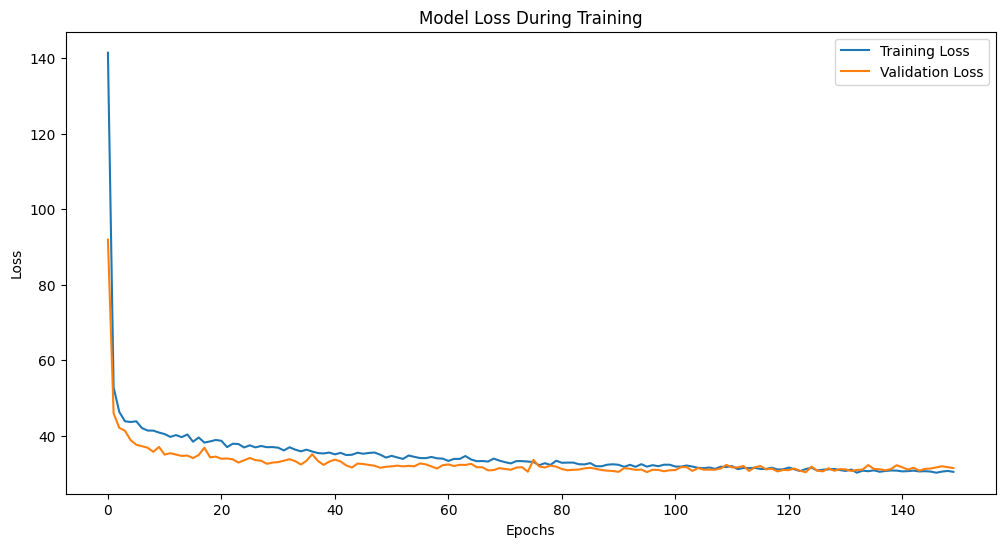

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The Mean Absolute Percentage Error (MAPE) is calculated. The success of this model can be seen in the fact that the MAPE on the Validation Data is only a little higher than the MAPE on the Training Data.

In [21]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAPE on the Training Data: 16.21%
MAPE on the Validation Data: 17.93%


Diagrams show for the first 100 cases that some values were predicted quite well, while others were not.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


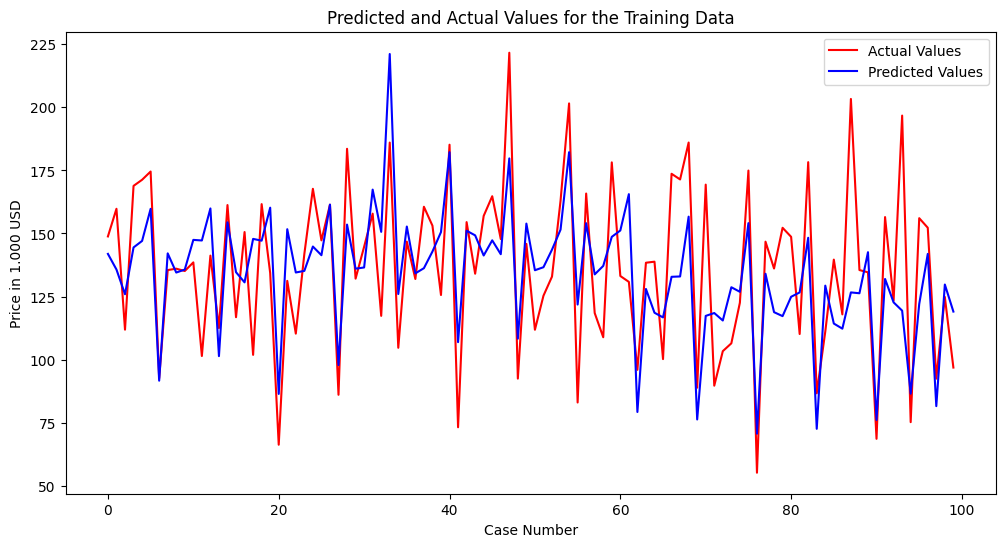

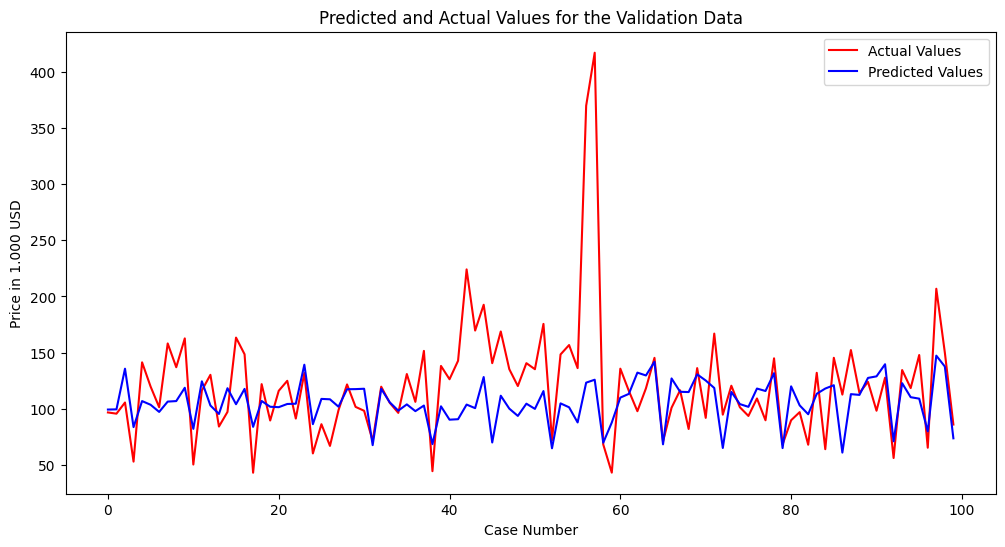

In [22]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
test_predictions = np.array(training_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

## 8 Predict
Finally the predictions for the Test Data are calculated and saved as a CSV file in the format to be uploaded to Kaggle.

In [23]:
pred_test = model.predict(test_features)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
import pandas as pd

# Create the final prediction DataFrame
final_predictions = pd.DataFrame({
    'id': test_data.index,  # Use the index from test_data as id
    'Umsatz': pred_test.flatten()  # Flatten the predictions array to 1D
})

# Set id as index if you want it as index instead of a column
# final_predictions.set_index('id', inplace=True)

print(final_predictions.head())

        id      Umsatz
0  1808011  134.724304
1  1808021  148.622238
2  1808031  147.016586
3  1808041  169.375473
4  1808051   98.131638


In [25]:
final_predictions

,id,Umsatz
0,1808011,134.724304
1,1808021,148.622238
2,1808031,147.016586
3,1808041,169.375473
4,1808051,98.131638
...,...,...
1825,1812226,87.556198
1826,1812236,80.438721
1827,1812246,88.672699
1828,1812276,81.814209


In [26]:
final_predictions.to_csv("neural_network1.csv", index=False) 